In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import math

In [58]:
df=pd.read_csv("C:\\Users\\admin\\Downloads\\machin learning project\\home price prediction\\Python_Linear_Regres (3).csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [47]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [59]:
df.drop(['Address','Date','Postcode','Longtitude','Lattitude','YearBuilt'],axis=1,inplace=True)

In [60]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


In [ ]:
# check datatype and null value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
df.drop(['Address','Date','Postcode','YearBuilt','Lattitude','Longtitude'],axis=1,inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,6.3,4.0,1.0,3.0,593.0,NaN,Maribyrnong City Council,Western Metropolitan,6543.0
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,2.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,Jas,6.3,2.0,1.0,2.0,220.0,120.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,6.3,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,Western Metropolitan,6543.0


In [6]:
df.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,7572.888306
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,4428.090313
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,83.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,4385.000000
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,6763.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,10412.000000
max,16.000000,1.120000e+07,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,21650.000000


In [8]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [63]:
df[['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']]=df[['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']].fillna(0)
df['Landsize']=df['Landsize'].fillna(df.Landsize.mean()) # mean thi fill 3 vaar avase
df['BuildingArea']=df['BuildingArea'].fillna(df.BuildingArea.mean())
#df[['BuildingArea','Landsize']]=df[['BuildingArea','Landsize']].fillna(df[['BuildingArea','Landsize']].mean())

In [65]:
df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       0
dtype: int64

In [66]:
df.dropna(inplace=True)

In [68]:
df.shape

(27244, 15)

In [13]:
 df['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [14]:
df['SellerG'].nunique()

349

In [15]:
df['CouncilArea'].unique() # categorical  veriable unnique check

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Whittlesea City Council', 'Frankston City Council',
       'Macedon Ranges Shire Council', 'Yarra Ranges Shire Council',
       'Wyndham City Council', 'Cardinia Shire Council',
       'Moorabool Shire Council', 'Mitchell Shire Council'], dtype=object)

In [17]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [70]:
df.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
Rooms,1.000000,0.465231,0.284260,0.558408,0.448790,0.342667,0.027477,0.086560,-0.079572
Price,0.465231,1.000000,-0.211415,0.301524,0.339020,0.201809,0.027099,0.066240,-0.059017
Distance,0.284260,-0.211415,1.000000,0.157659,0.103052,0.189324,0.044124,0.050289,-0.021705
Bedroom2,0.558408,0.301524,0.157659,1.000000,0.842662,0.692635,0.017225,0.051179,-0.049639
Bathroom,0.448790,0.339020,0.103052,0.842662,1.000000,0.627156,0.023527,0.061372,-0.042507
Car,0.342667,0.201809,0.189324,0.692635,0.627156,1.000000,0.022484,0.049306,-0.024135
Landsize,0.027477,0.027099,0.044124,0.017225,0.023527,0.022484,1.000000,0.087274,-0.013485
BuildingArea,0.086560,0.066240,0.050289,0.051179,0.061372,0.049306,0.087274,1.000000,-0.016039
Propertycount,-0.079572,-0.059017,-0.021705,-0.049639,-0.042507,-0.024135,-0.013485,-0.016039,1.000000


<AxesSubplot:>

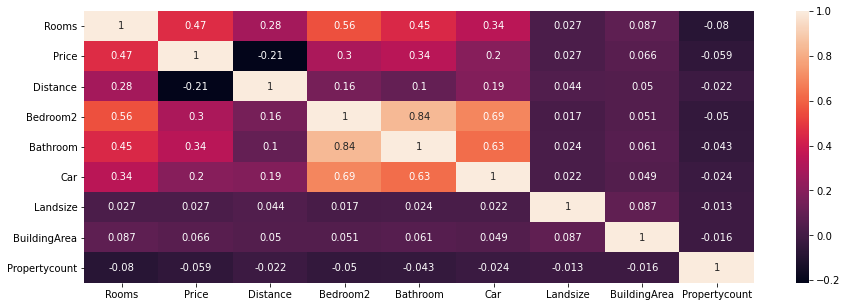

In [74]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

# data analysis

<AxesSubplot:xlabel='Rooms'>

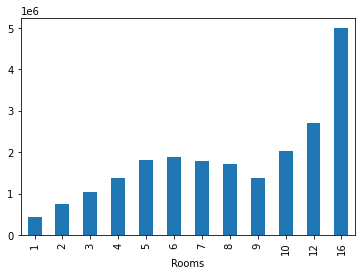

In [76]:
df.groupby('Rooms')['Price'].mean().plot(kind='bar')

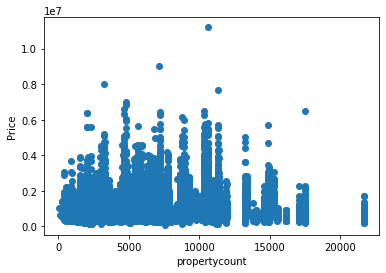

In [78]:
plt.scatter(df['Propertycount'],df['Price'])
plt.xlabel('propertycount')
plt.ylabel('Price')
plt.show()

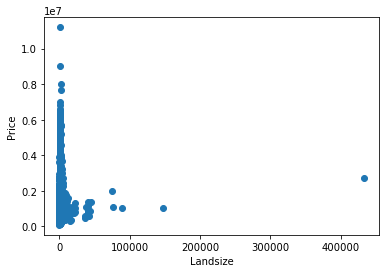

In [79]:
plt.scatter(df['Landsize'],df['Price'])
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

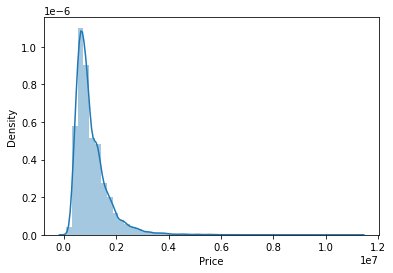

In [80]:
sns.distplot(df['Price'])

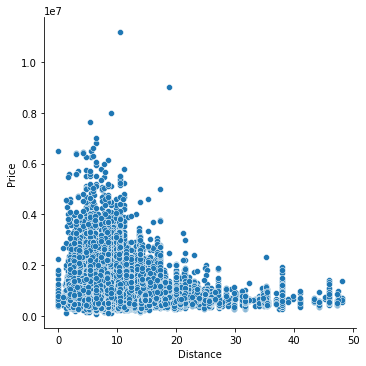

In [81]:
sns.relplot(x=df['Distance'],y=df['Price'])

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'Propertycount'}>]], dtype=object)

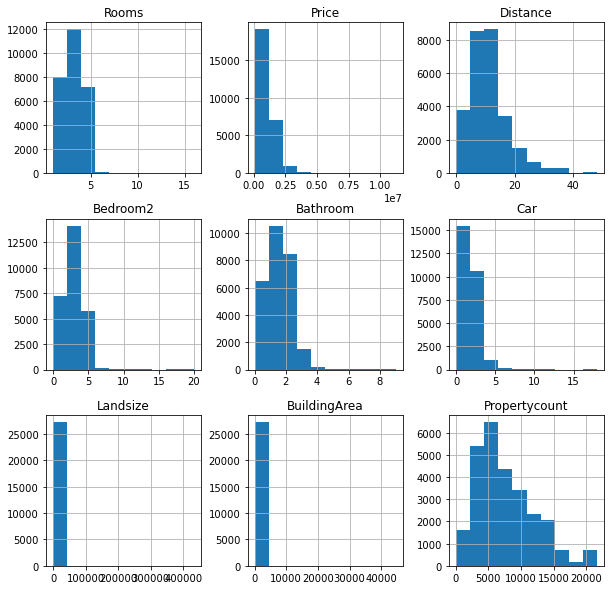

In [83]:
df.hist(figsize=(10,10))

In [84]:
df = pd.get_dummies(df, drop_first=True) # label encoding best

In [85]:
df.shape

(27244, 745)

In [21]:
df

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2.0,1.0,1.0,202.000000,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.000000,79.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.000000,150.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3.0,2.0,1.0,94.000000,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.000000,142.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,4.0,1.0,3.0,593.000000,160.2564,6543.0,0,...,0,0,0,0,0,0,0,0,1,0
34853,2,888000.0,6.3,2.0,2.0,1.0,98.000000,104.0000,6543.0,0,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000.0,6.3,2.0,1.0,2.0,220.000000,120.0000,6543.0,0,...,0,0,0,0,0,0,0,0,1,0
34855,3,1140000.0,6.3,0.0,0.0,0.0,593.598993,160.2564,6543.0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0


In [23]:
X = df.drop('Price', axis=1)
y = df['Price']

In [86]:
y.head()

1    1480000.0
2    1035000.0
4    1465000.0
5     850000.0
6    1600000.0
Name: Price, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2, )

# Apply LinearRegression

In [91]:
from sklearn.linear_model import LinearRegression   
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [92]:
reg.score(X_test,y_test)

0.13853683161528418

In [93]:
reg.score(X_train,y_train)

0.6827792395792723

# predict data

In [31]:
y_pred=reg.predict(X_test)

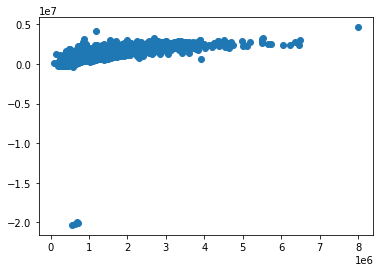

In [94]:
plt.scatter(y_test,y_pred)

In [102]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [103]:
print("r2_score: ",r2_score(y_test,y_pred))
print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RMSE : ",math.sqrt(mean_squared_error(y_test,y_pred))) 

r2_score:  0.13853683161528418
MSE :  342275472104.18616
MAE :  246805.62890763526
RMSE :  585043.1369601614


# Model Regularization

# RIDGE

In [104]:
from sklearn.linear_model import Ridge    

In [105]:
ridge_reg= Ridge(alpha=50, max_iter=100,)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100)

In [106]:
ridge_reg.score(X_test,y_test)

0.6670848945194976

In [34]:
y_predict=ridge_reg.predict(X_test)

In [107]:
ridge_reg.score(X_train, y_train)

0.6622376739684324

In [36]:
# Lasso Regression

In [37]:
Lasso_reg=Lasso(alpha=50,max_iter=100)
Lasso_reg.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1329087287481363.5, tolerance: 796258688308.2257
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100)

In [38]:
Lasso_reg.score(X_train,y_train)

0.6767356948457685

In [39]:
Lasso_reg.score(X_train, y_train)


0.6767356948457685

In [40]:
y_predict=Lasso_reg.predict(X_test)

In [41]:
print('coefficient:',reg.coef_)
print('intercept:',reg.intercept_)

coefficient: [ 2.64001655e+05 -4.64732744e+04 -8.22349031e+04  1.17151153e+05
  4.29703140e+04  2.35173742e+00  4.70024530e+02  4.92118905e+00
  2.61342069e+05 -4.61008827e+04 -1.32312259e+05  2.15453995e+05
  1.20133839e+05  2.72683980e+05  1.74702166e+05 -8.00201053e+04
 -1.50967673e+05 -4.94461444e+04  1.17711126e+05 -1.28880253e+05
 -3.49349656e+04 -8.54261329e+03  6.19157896e+04 -2.57258028e+05
 -1.10868116e+05 -2.42391674e+05  1.79856957e+05 -1.22395100e+05
  2.04625284e+05  3.78258911e+04  1.46681364e+05  2.32198627e+03
  7.35395731e+04 -5.29198411e+04  1.90482393e+05 -3.20451670e+05
  7.49515014e+04 -2.83019804e+04  2.69103300e+04  2.78824270e+05
  1.51386730e+05 -1.06324212e+05 -8.45087700e+04  2.96568248e+05
  1.50644588e+05  1.26194209e-07  1.75999576e+05 -1.20057166e+05
 -9.64544651e+03  3.68377378e+05 -1.35478625e+05 -6.38092126e+04
  3.53493139e+04  1.12364756e+05  1.50210824e+04  3.80702958e+04
 -2.07783976e+04  1.76019967e-07 -2.80289620e+05  3.62799617e+06
 -1.70813150

In [42]:
print('mean_squared_error: ',mean_squared_error(y_test,y_predict))
print('mean_absolute_error: ',mean_absolute_error(y_test,y_predict))
print('R2_score: ',r2_score(y_test,y_predict))
print('root_mean_squared_error: ',math.sqrt(mean_squared_error(y_test,y_predict)))

mean_squared_error:  133591688422.44235
mean_absolute_error:  236920.9358677323
R2_score:  0.6637669697137103
root_mean_squared_error:  365501.9677408623


In [ ]:
y_predict=reg.predict(X)
y_predict

# RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(250)
rf.fit(X_train,y_train)

In [ ]:
rf.score(x_test,y_test)

In [129]:
yy=rf.predict(X_test)

In [136]:
print("r2_score: ",r2_score(y_test,yy))
print("MSE : ",mean_squared_error(y_test,yy))
print("MAE : ",mean_absolute_error(y_test,yy))
print("RMSE : ",math.sqrt(mean_squared_error(y_test,yy)))

r2_score:  0.7752100708273956
MSE :  89313254420.48328
MAE :  172817.6786679618
RMSE :  298853.23224031436


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


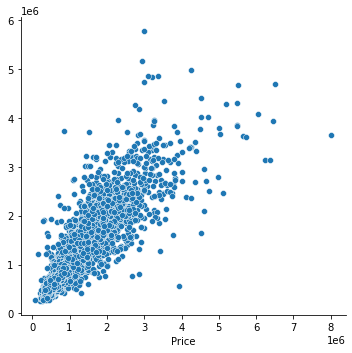

In [134]:
sns.relplot(y_test,yy)

In [138]:
mylist=[1,4,2,5,10]
mysortedlist=mylist.sort()
print(mysortedlist)

None
